In [1]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import gammapy

# from gammapy.datasets import MapDataset
from gammapy.maps import Map, MapAxis
from astropy.coordinates import SkyCoord, Angle
from gammapy.modeling import Fit, Parameter, Parameters, Covariance
from gammapy.datasets import MapDataset #, MapDatasetNuisance
from gammapy.modeling.models import (
    PowerLawSpectralModel,
    create_crab_spectral_model,
    SkyModel,
    PointSpatialModel, 
    ShellSpatialModel,
    GeneralizedGaussianSpatialModel,
    TemplateSpatialModel,
    LogParabolaSpectralModel,
    GaussianSpatialModel,
    DiskSpatialModel,
    PowerLawNormSpectralModel,
    Models,
    SpatialModel,
    FoVBackgroundModel,
)
from regions import CircleSkyRegion, RectangleSkyRegion
import yaml
import sys
import json
sys.path.append(
    "/home/hpc/caph/mppi045h/3D_analysis/N_parameters_in_L/syserror_3d_bkgmodel/4-Fitting_nuisance_and_model_parameters"
)
from my_dataset_maps_19 import MapDatasetNuisance
from  my_fit_19 import Fit

In [2]:
amplitudes_write = np.logspace(-14, -9, 6)
outputfolder = 'output/data_asimov_tests'

plotaa= '/home/hpc/caph/mppi045h/3D_analysis/N_parameters_in_L/publication/Robustness/plots'

In [3]:
finished = []
started = []


for a in amplitudes_write:
    print()
    print("Input Amplitude:")
    amplitude =a * u.Unit('cm-2 s-1 TeV-1')
    print(a)
    outputfile = '/OOutput'+str(amplitude.value)+'.json'

    with open(outputfolder+outputfile, 'r') as f:
        data = json.load(f)
    count_started = 0
    count_finished = 0

    rnds = list(data.keys()) 
    rnd_started, rnd_finished = [], []
    for i in range(len(rnds)):
        if (data[str(rnds[i])]['started'] == True):
            count_started += 1
            rnd_started.append(int(rnds[i]))
        try:
            data[str(rnds[i])]['result'] 
            count_finished += 1
            rnd_finished.append(int(rnds[i]))
            
        except:
            None

    print(f"Started:  { count_started} out of {len(rnds)}: {rnd_started}")
    print(f"Finished: { count_finished} out of {len(rnds)}: {rnd_finished}")
    finished.append(len(rnd_finished))
    started.append(len(rnd_started))    


Input Amplitude:
1e-14
Started:  20 out of 100: [0, 1, 2, 10, 11, 20, 21, 30, 31, 32, 40, 41, 50, 60, 70, 71, 80, 97, 98, 99]
Finished: 4 out of 100: [0, 10, 31, 40]

Input Amplitude:
1e-13
Started:  8 out of 100: [0, 10, 20, 30, 40, 41, 50, 60]
Finished: 1 out of 100: [40]

Input Amplitude:
1e-12
Started:  57 out of 100: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Finished: 56 out of 100: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

Input Amplitude:
1e-11
Started:  45 out of 100: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20, 21, 22, 23, 24, 25, 26, 27, 40, 41, 42, 43, 44, 45, 46, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 80, 81, 82, 83, 84, 85, 86, 87, 88, 

In [4]:
finished_quo  = [0, 1, 56, 42, 50, 12]
print(finished)

[4, 1, 56, 42, 88, 64]


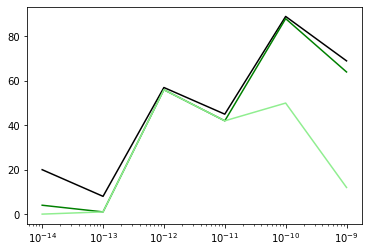

In [5]:
plt.plot(amplitudes_write, started, color = 'black')

plt.plot(amplitudes_write, finished, color = 'green')
plt.plot(amplitudes_write, finished_quo, color = 'lightgreen')


plt.xscale('log')